In [1]:
import os
path = os.getcwd()

1、导入数据

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [4]:
data = pd.read_csv(path + '/PS_20174392719_1491204439457_log.csv')
data = data.rename(columns = {'oldbalanceOrg':'oldBalanceOrig',
                              'newbalanceOrig':'newBalanceOrig',
                              'oldbalanceDest':'oldBalanceDest',
                              'newbalanceDest':'newBalanceDest'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest          object
oldBalanceDest    float64
newBalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# step：          在现实世界中映射的一段时间，1步即1小时，总共744step（积累31天）。
# type：          转账类型CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER
# amount：        交易金额
# nameOrig：      交易发起方的客户
# oldBalanceOrig：交易发起方交易前的余额
# newBalanceOrig：交易发起方交易后的新余额
# nameDest：      交易接收方的客户
# oldBalanceDest：交易接收方交易前的余额收款；没有以M（商家）开头的客户信息。
# newBalanceDest：交易接收方交易后的余额收款；没有以M（商家）开头的客户信息。
# isFraud：       代理商欺诈行为标签0、1
# isFlaggedFraud：该商业模式旨在控制并标记非法交易，该数据集中的非法交易是尝试在单个交易中传输超过200.000
print(data.head())

   step      type    amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [6]:
# 判断是否有缺失值
data.isnull().values.any()

False

2、数据探索与分析

In [7]:
# 查看转账类型
print('转账类型统计：')
print(data['type'].value_counts())
# 查看转账类型与欺诈标记间的关系
print('\n转账类型与欺诈标记间的统计关系：')
print(data.groupby(['type', 'isFraud']).size())
# 查看存在欺诈行为的转账交易类型对应的数据
print('\n存在欺诈行为的转账交易类型为{}'.format(
    list(data.loc[data['isFraud'] == 1].type.drop_duplicates().values)))

FraudTransfer_data = data.loc[(data['isFraud'] == 1) & (data['type'] == 'TRANSFER')]
FraudCashout_data = data.loc[(data['isFraud'] == 1) & (data['type'] == 'CASH_OUT')]

print ('\n交易类型为TRANSFER欺诈交易数目：{}'.format(len(FraudTransfer_data)))
print ('\n交易类型为CASH_OUT欺诈交易数目：{}'.format(len(FraudCashout_data)))

转账类型统计：
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

转账类型与欺诈标记间的统计关系：
type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

存在欺诈行为的转账交易类型为['TRANSFER', 'CASH_OUT']

交易类型为TRANSFER欺诈交易数目：4097

交易类型为CASH_OUT欺诈交易数目：4116


In [8]:
# 查看转账类型与商业模式欺诈标记间的关系
print('转账类型与商业模式欺诈标记间的统计关系：')
print(data.groupby(['type', 'isFlaggedFraud']).size())
# 查看欺商业模式欺诈标签为1所对应的交易类型数据
print('isFlaggedFraud标签为1的交易类型为{}'.format(
    list(data.loc[data['isFlaggedFraud'] == 1].type.drop_duplicates())))

# 交易类型为TRANSFER的所有数据
Transfer_data = data.loc[data['type'] == 'TRANSFER']
# isFlaggedFraud标签为1的所有数据
Flagged_data = data.loc[data['isFlaggedFraud'] == 1]
# isFlaggedFraud标签为0的所有数据
NonFlagged_data = data.loc[data['isFlaggedFraud'] == 0]

print('\nisFlaggedFraud标签为1的最小交易金额：{}'
      .format(Flagged_data['amount'].min()))
print('\n交易类型为TRANSFER且isFlaggedFraud标签为0的最大交易金额：{}'
      .format(Transfer_data.loc[Transfer_data['isFlaggedFraud'] == 0].amount.max()))

转账类型与商业模式欺诈标记间的统计关系：
type      isFlaggedFraud
CASH_IN   0                 1399284
CASH_OUT  0                 2237500
DEBIT     0                   41432
PAYMENT   0                 2151495
TRANSFER  0                  532893
          1                      16
dtype: int64
isFlaggedFraud标签为1的交易类型为['TRANSFER']

isFlaggedFraud标签为1的最小交易金额：353874.22

交易类型为TRANSFER且isFlaggedFraud标签为0的最大交易金额：92445516.64


In [9]:
# 查看oldBalanceDest、newBalanceDest与isFlaggedFraud间的关系
print('交易前的收款人与商业模式欺诈标记间的统计关系：')
print(data[data['type'] == 'TRANSFER'].groupby(['oldBalanceDest', 'isFlaggedFraud']).size())
print('\n交易后的收款人与商业模式欺诈标记间的统计关系：')
print(data[data['type'] == 'TRANSFER'].groupby(['newBalanceDest', 'isFlaggedFraud']).size())

# 确定oldBalanceDest和newBalanceDest对isFlaggedFraud状态影响
print('交易类型为TRANSFER, 且isFlaggedFraud = 0, oldBalanceDest = 0, newBalanceDest = 0的数目: {}'
      .format(len(Transfer_data.loc[(Transfer_data['isFlaggedFraud'] == 0) &
                                    (Transfer_data['oldBalanceDest'] == 0) &
                                    (Transfer_data['newBalanceDest'] == 0)])))
# 结论：oldBalanceDest、newBalanceDest对isFlaggedFraud不造成影响

交易前的收款人与商业模式欺诈标记间的统计关系：
oldBalanceDest  isFlaggedFraud
0.000000e+00    0                 65117
                1                    16
1.000000e+00    0                     1
2.000000e+00    0                     2
3.840000e+00    0                     1
5.000000e+00    0                     1
6.360000e+00    0                     1
6.450000e+00    0                     1
7.000000e+00    0                     1
7.490000e+00    0                     1
8.000000e+00    0                     1
8.420000e+00    0                     1
1.058000e+01    0                     1
1.200000e+01    0                     1
1.210000e+01    0                     1
1.300000e+01    0                     2
1.509000e+01    0                     1
1.689000e+01    0                     1
1.700000e+01    0                     1
1.800000e+01    0                     1
1.844000e+01    0                     1
2.026000e+01    0                     1
2.100000e+01    0                     1
2.228000e+01    0        

3、数据清洗

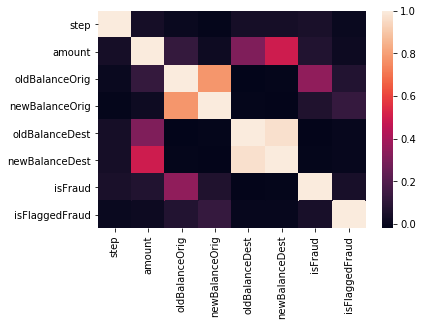

In [5]:
# 提取数据类型为TRANSFER、CASH_OUT的数据
X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]
sns.heatmap(X.corr())  # 变量相关性热力图

Y = X['isFraud']
del X['isFraud']

In [6]:
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
# 数据类型为TRANSFER、CASH_OUT转化为0、1
X.loc[X['type'] == 'TRANSFER', 'type'] = 0
X.loc[X['type'] == 'CASH_OUT', 'type'] = 1
X['type'] = X['type'].astype(int)

In [7]:
X.loc[(X['oldBalanceDest'] == 0) &
      (X['newBalanceDest'] == 0) &
      (X['amount'] != 0),
      ['oldBalanceDest', 'newBalanceDest']] = - 1
X.loc[(X['oldBalanceOrig'] == 0) &
      (X['newBalanceOrig'] == 0) &
      (X['amount'] != 0),
      ['oldBalanceOrig', 'newBalanceOrig']] = np.nan

4、构造特征因子

In [8]:
X['errorBalanceOrig'] = X.newBalanceOrig + X.amount - X.oldBalanceOrig
X['errorBalanceDest'] = X.oldBalanceDest + X.amount - X.newBalanceDest

In [9]:
X.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,-1.0,-1.00,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0


5、数据可视化

In [15]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (16, 12)):
    
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x,
                           y,
                           hue = hue,
                           jitter = 0.4,
                           marker = '.',
                           size = 4,
                           palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['真实交易', '欺诈交易'], size = 20)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles,
                   ['Transfer', 'Cash out'],
                   bbox_to_anchor = (1, 1),
                   loc = 2,
                   borderaxespad = 0,
                   fontsize = 20)
    return ax

Text(0.5,1,'欺诈性交易与真实性交易分布随时间变化情况')

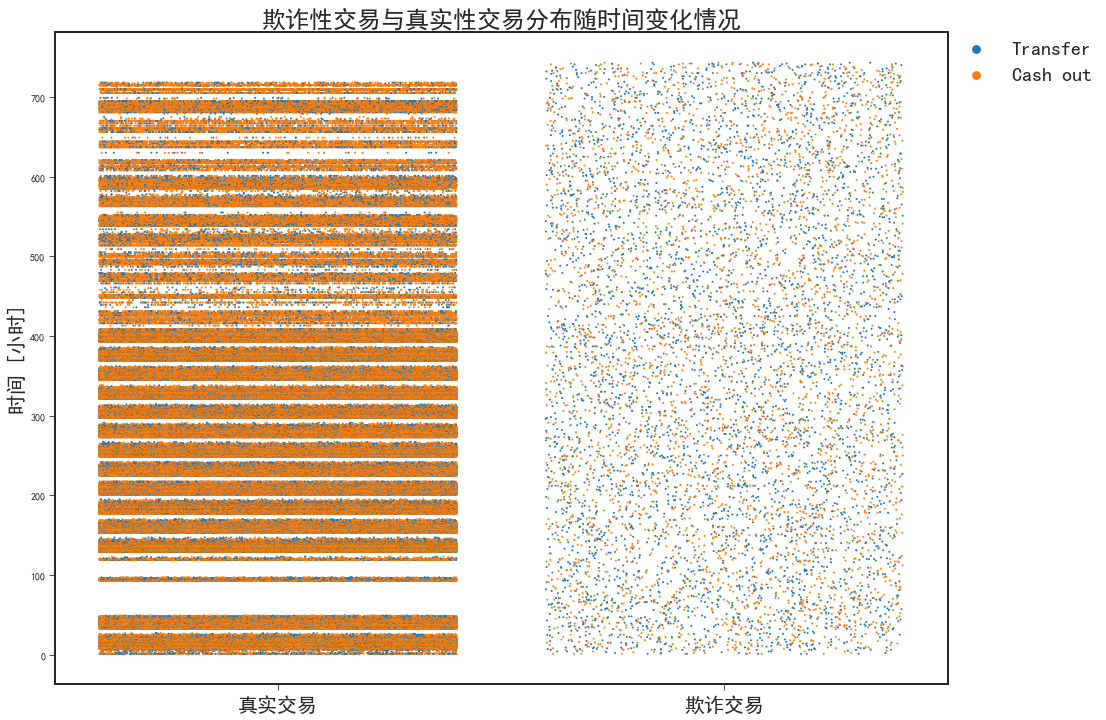

In [16]:
# 随时间扩散
ax = plotStrip(Y[:limit], X['step'][:limit], X['type'][:limit])
ax.set_ylabel('时间 [小时]', size = 20)
ax.set_title('欺诈性交易与真实性交易分布随时间变化情况', size = 24)

Text(0.5,1,'具有相同标签的欺诈性交易与真实性交易的金额分布变化情况')

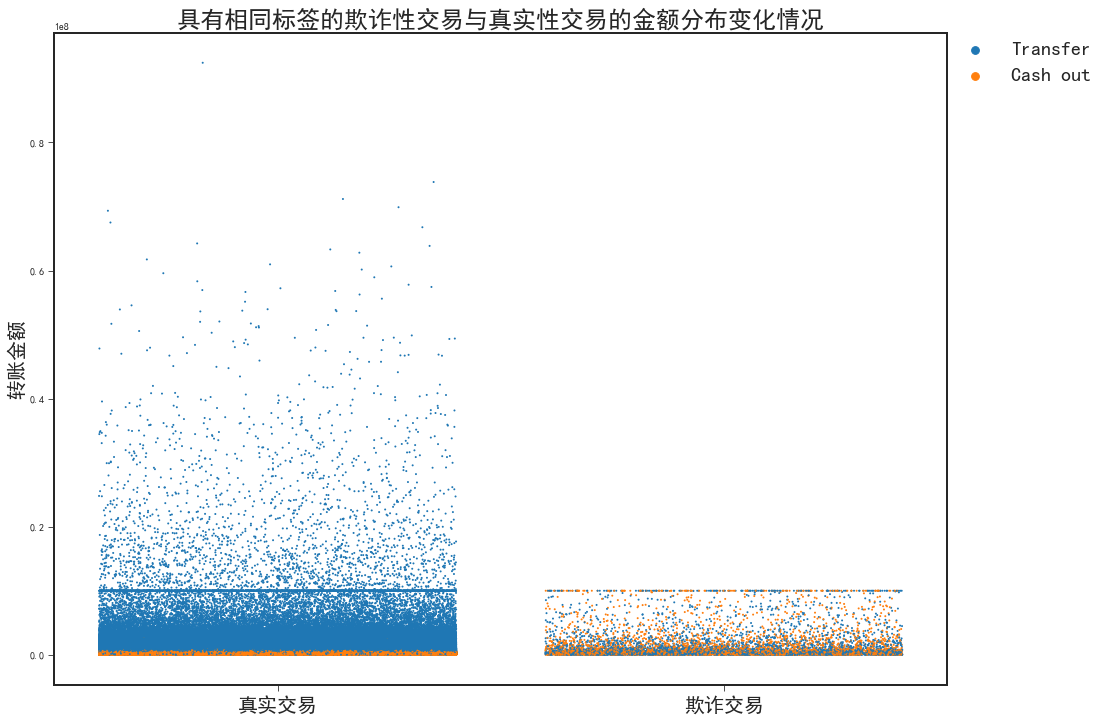

In [17]:
ax = plotStrip(Y[:limit], X['amount'][:limit], X['type'][:limit])
ax.set_ylabel('转账金额', size = 20)
ax.set_title('具有相同标签的欺诈性交易与真实性交易的金额分布变化情况', size = 24)

Text(0.5,1,'目标账户余额的极性误差')

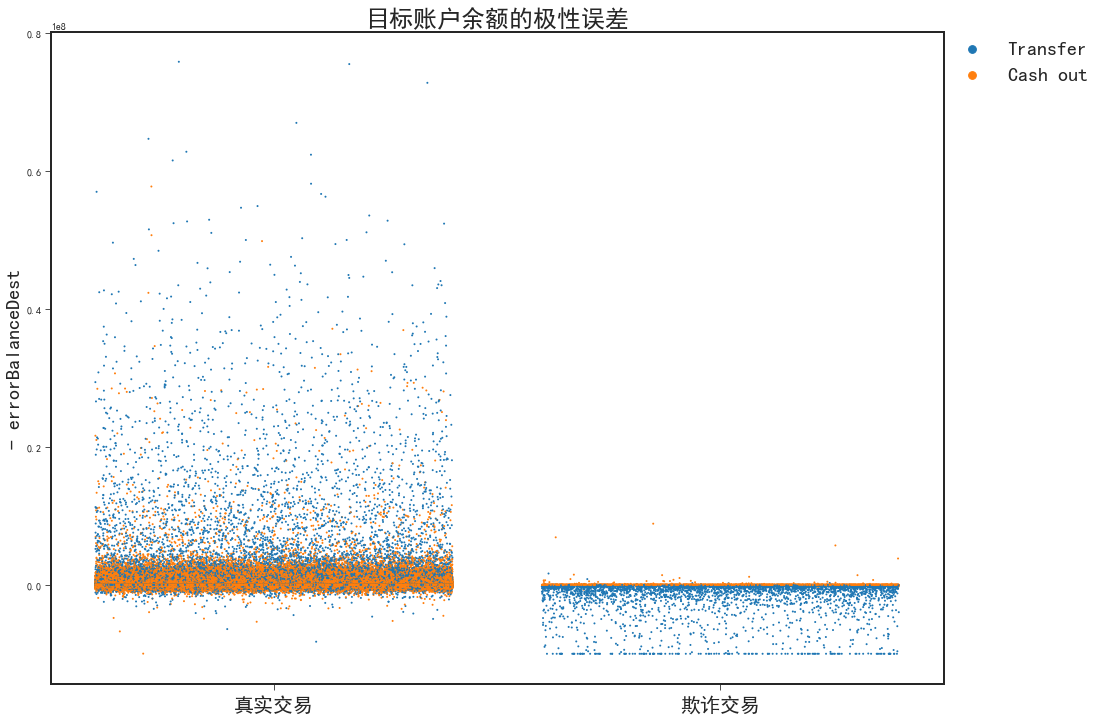

In [18]:
ax = plotStrip(Y[:limit], - X.errorBalanceDest[:limit], X['type'][:limit])
ax.set_ylabel('- errorBalanceDest', size = 20)
ax.set_title('目标账户余额的极性误差', size = 24)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


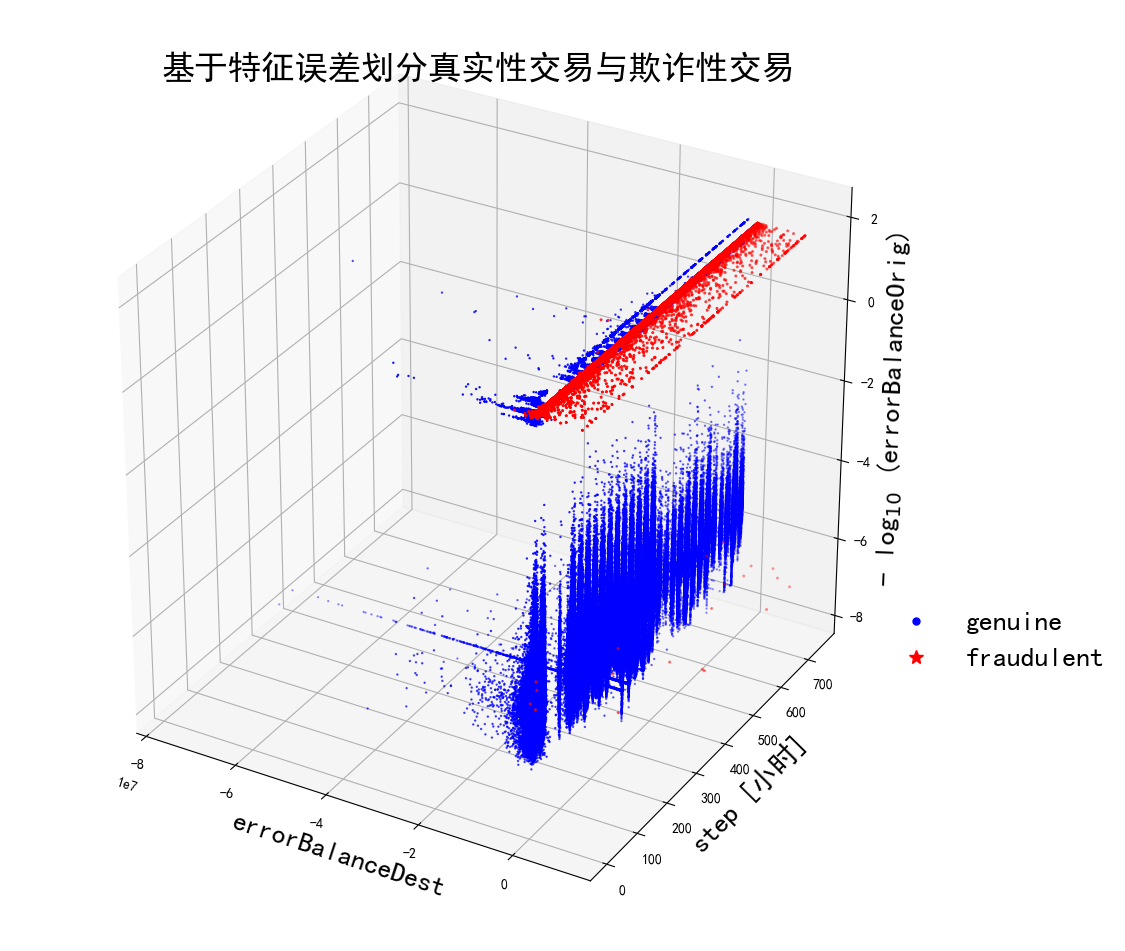

In [11]:
# 三维显示
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.02
limit = len(X)

sns.reset_orig() # 防止seaborn超越mplot3d默认值

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X.loc[Y == 0, x][:limit],
           X.loc[Y == 0, y][:limit],
           - np.log10(X.loc[Y == 0, z][:limit] + zOffset),
           c = 'b',
           marker = '.',
           s = 2,
           label = 'genuine')
ax.scatter(X.loc[Y == 1, x][:limit],
           X.loc[Y == 1, y][:limit],
           - np.log10(X.loc[Y == 1, z][:limit] + zOffset),
           c = 'r',
           marker = '*',
           s = 2,
           label = 'fraudulent')
ax.set_xlabel(x, size = 20); 
ax.set_ylabel(y + ' [小时]', size = 20); 
ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 20)
ax.set_title('基于特征误差划分真实性交易与欺诈性交易', size = 24)
plt.axis('tight')
ax.grid(1)

noFraudMarker = mlines.Line2D([],
                              [],
                              linewidth = 0,
                              color = 'b',
                              marker = '.',
                              markersize = 10,
                              label = 'genuine')
fraudMarker = mlines.Line2D([],
                            [],
                            linewidth = 0,
                            color = 'r',
                            marker = '*',
                            markersize = 10,
                            label = 'fraudulent')
plt.legend(handles = [noFraudMarker, fraudMarker],
           bbox_to_anchor = (1.20, 0.38 ),
           frameon = False,
           prop={'size': 20})

[Text(1,0,'-1.0'),
 Text(1,0.25,'-0.5'),
 Text(1,0.5,'0.0'),
 Text(1,0.75,'0.5'),
 Text(1,1,'1.0')]

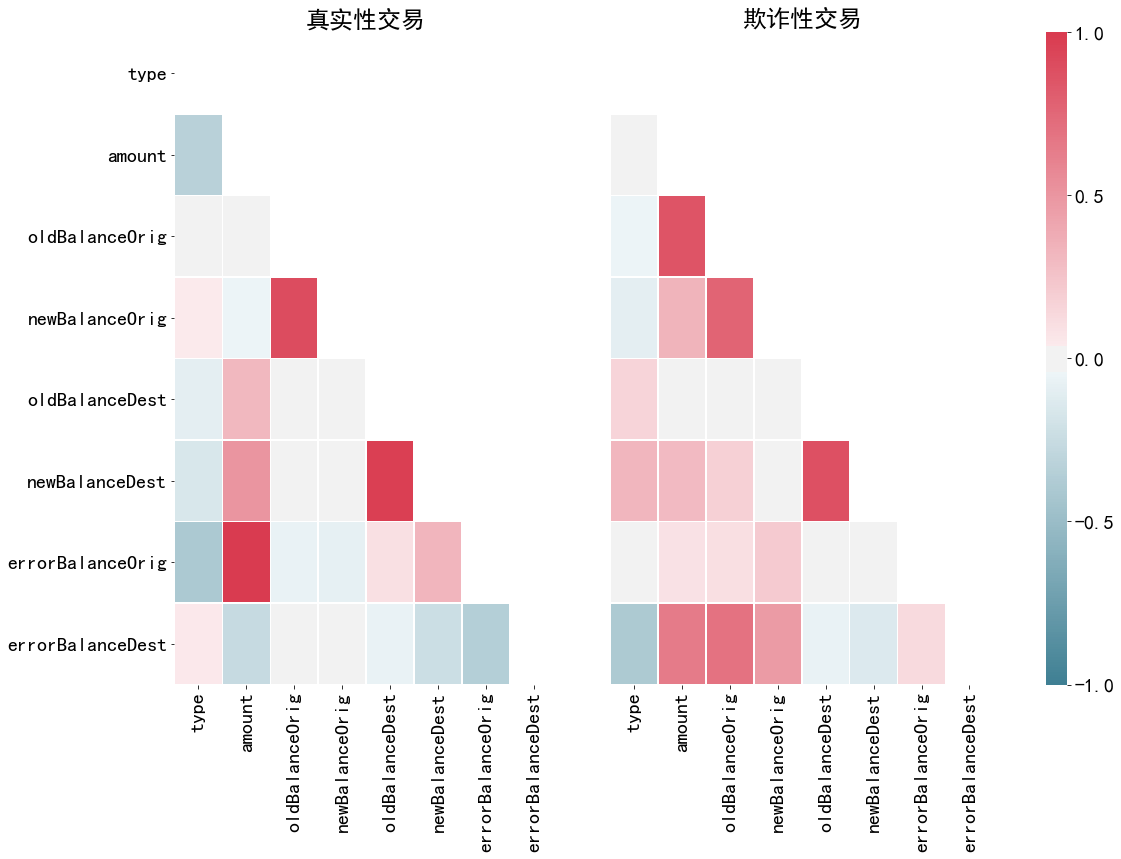

In [12]:
# 变量自相关图
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {'width_ratios': (.9, .9, .05), 'wspace': 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1,
                                      3,
                                      gridspec_kw = grid_kws,
                                      figsize = (16, 12))

cmap = sns.diverging_palette(220, 8, as_cmap = True)
ax1 = sns.heatmap(correlationNonFraud,
                  ax = ax1,
                  vmin = -1,
                  vmax = 1,
                  cmap = cmap,
                  square = False,
                  linewidths = 0.5,
                  mask = mask,
                  cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 20); 
ax1.set_yticklabels(ax1.get_yticklabels(), rotation = 0, size = 20); 
ax1.set_title('真实性交易', size = 24)

correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud,
                  vmin = -1,
                  vmax = 1,
                  cmap = cmap,
                  ax = ax2,
                  square = False,
                  linewidths = 0.5,
                  mask = mask,
                  yticklabels = False,
                  cbar_ax = cbar_ax,
                  cbar_kws={'orientation': 'vertical',
                            'ticks': [-1, -0.5, 0, 0.5, 1]}
                 )
ax2.set_xticklabels(ax2.get_xticklabels(), size = 20)
ax2.set_title('欺诈性交易', size = 24)

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 20)

6、模型构建

In [13]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost import XGBClassifier
from xgboost import plot_importance

In [14]:
# 欺诈性交易在所有交易中所占比例
print('skew = {}'.format(len(Xfraud) / float(len(X))))

skew = 0.002964544224336551


In [15]:
# 平衡数据处理
randomState = 5
np.random.seed(randomState)

trainX, testX, trainY, testY = train_test_split(X,
                                                Y,
                                                test_size = 0.2,
                                                random_state = randomState)

weights = ((Y == 0).sum() / (1.0 * (Y == 1).sum()))
print('平衡数据调整权重：', weights)

# 训练XGBoost模型
clf = XGBClassifier(max_depth = 3,
                    scale_pos_weight = weights,
                    n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, probabilities[:, 1])))

平衡数据调整权重： 336.3199805186899
AUPRC = 0.9986361116985444


Text(0.5,1,'模型学习后特征重要性排序')

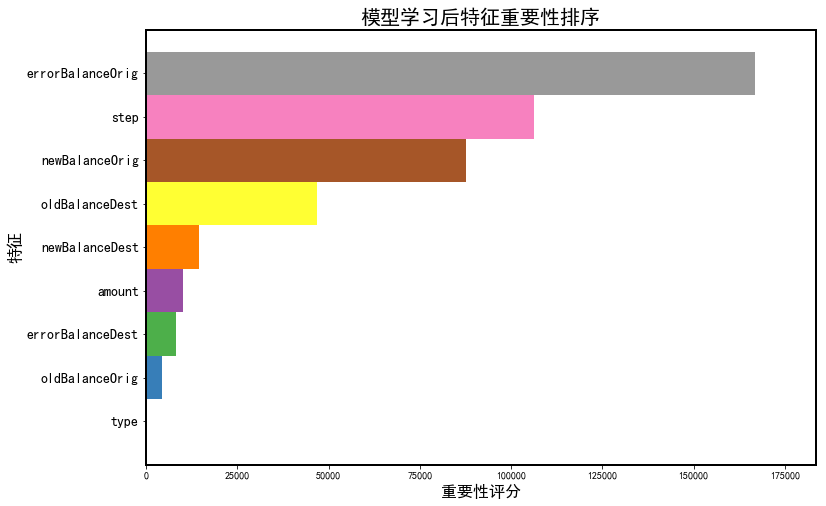

In [15]:
# 确定特征因子重要性
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf,
                     height = 1,
                     color = colours,
                     grid = False,
                     show_values = False,
                     importance_type = 'cover',
                     ax = ax)
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

ax.set_xlabel('重要性评分', size = 16)
ax.set_ylabel('特征', size = 16)
ax.set_yticklabels(ax.get_yticklabels(), size = 14)
ax.set_title('模型学习后特征重要性排序', size = 20)

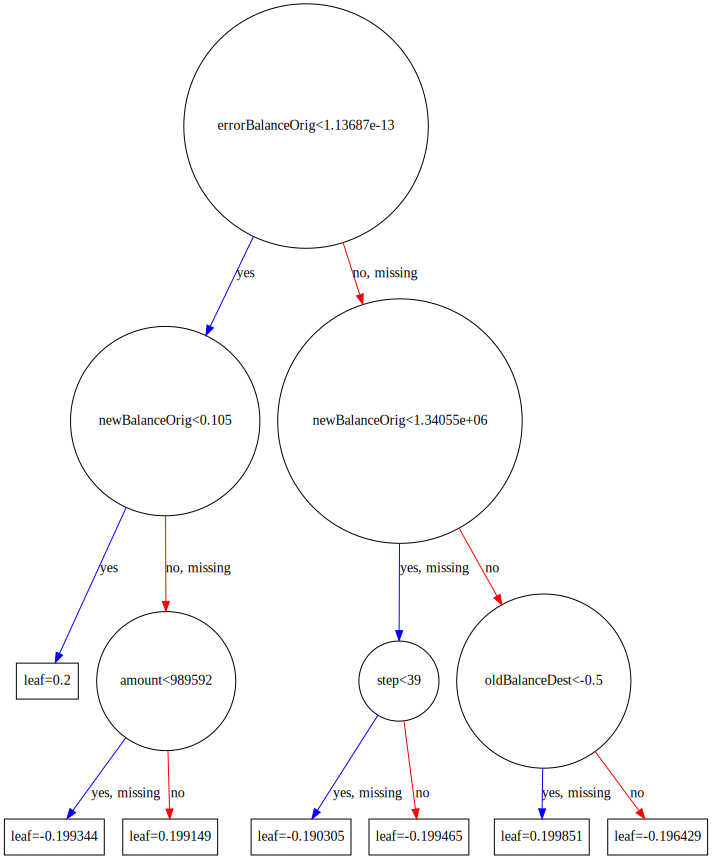

In [21]:
os.environ["PATH"] += os.pathsep + 'D:/Anaconda3/Graphviz2.38/bin/'
# 模型重要性的决策树可视化
# from xgboost import plot_tree
# def ceate_feature_map(features):
#     outfile = open(path + '/xgb.fmap', 'w')
#     i = 0
#     for feat in features:
#         outfile.write('{0}\t{1}\tq\n'.format(i, feat))
#         i = i + 1
#     outfile.close()
# ceate_feature_map(trainX.columns)  # 特征名列表
# plot_tree(clf, fmap = 'xgb.fmap')

from xgboost import to_graphviz
to_graphviz(clf)

In [18]:
# 学习曲线显示精度
trainSizes, trainScores, crossValScores = learning_curve(
    XGBClassifier(max_depth = 3,
                  scale_pos_weight = weights,
                  n_jobs = 4),
    trainX,
    trainY,
    scoring = 'average_precision'
)

Text(0.5,1,'Learning curves indicate slightly underfit model')

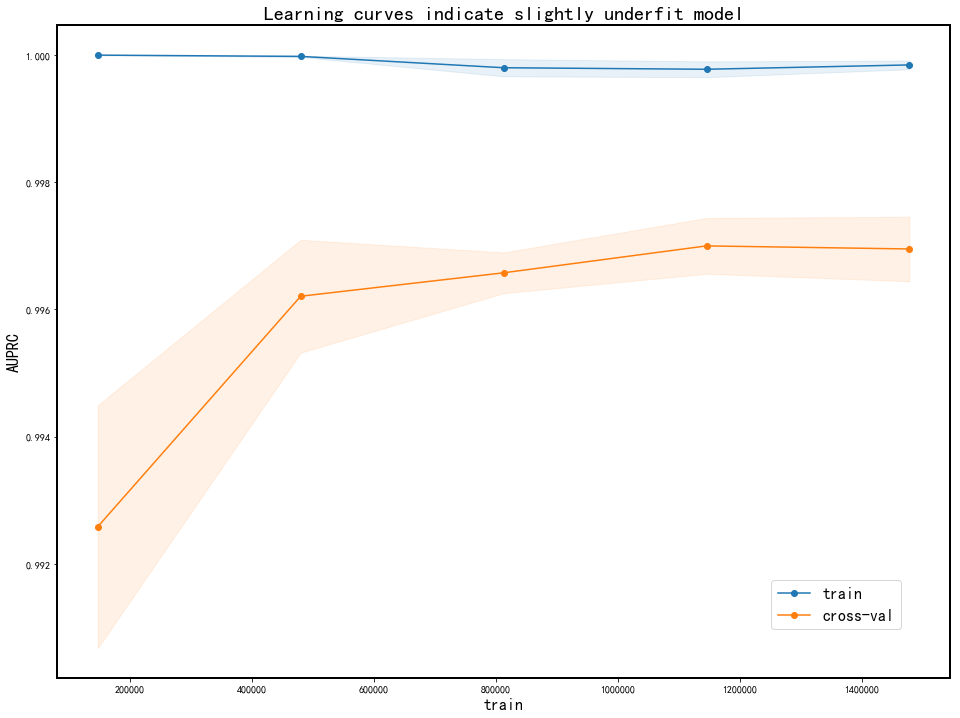

In [19]:
trainScoresMean = np.mean(trainScores, axis = 1)
trainScoresStd = np.std(trainScores, axis = 1)
crossValScoresMean = np.mean(crossValScores, axis = 1)
crossValScoresStd = np.std(crossValScores, axis = 1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (16, 12))
plt.fill_between(trainSizes,
                 trainScoresMean - trainScoresStd,
                 trainScoresMean + trainScoresStd,
                 alpha = 0.1,
                 color = colours[0])
plt.fill_between(trainSizes,
                 crossValScoresMean - crossValScoresStd,
                 crossValScoresMean + crossValScoresStd,
                 alpha = 0.1,
                 color = colours[1])
plt.plot(trainSizes,
         trainScores.mean(axis = 1),
         'o-',
         label = 'train',
         color = colours[0])
plt.plot(trainSizes,
         crossValScores.mean(axis = 1),
         'o-',
         label = 'cross-val',
         color = colours[1])

ax = plt.gca()
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,
           ['train', 'cross-val'],
           bbox_to_anchor = (0.8, 0.15),
           loc = 2,
           borderaxespad = 0,
           fontsize = 16)
plt.xlabel('train', size = 16)
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20)